<a href="https://colab.research.google.com/github/suelen-prs/EBAC/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/dsvitorchaves/EBAC/main/previsao_de_renda.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

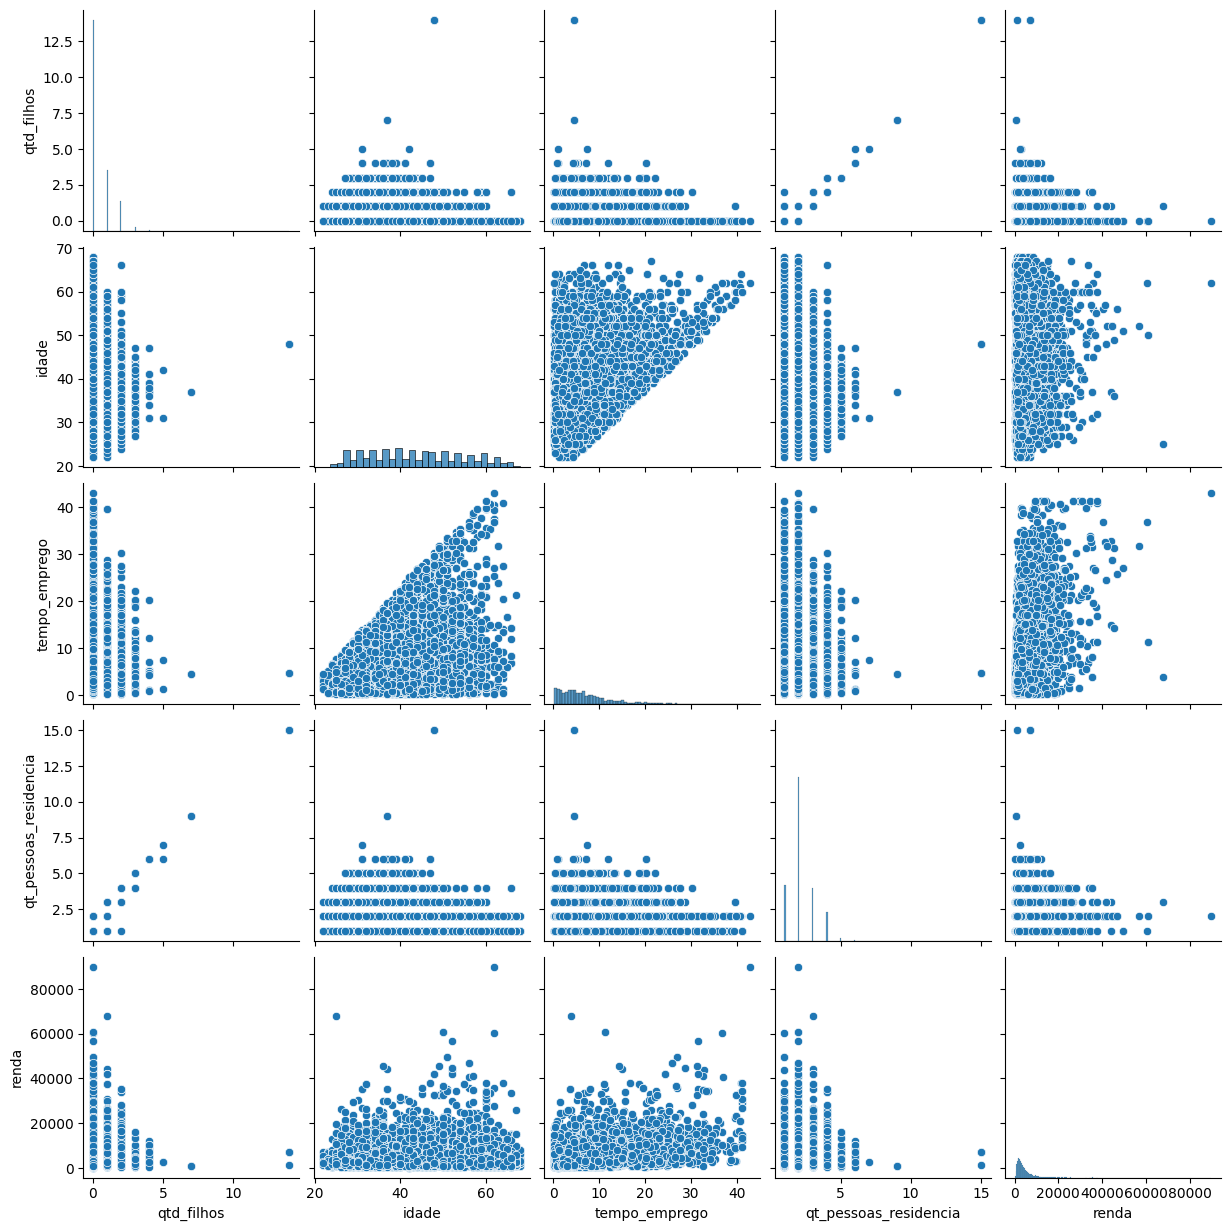

In [3]:
# Matriz de dispersão
sns.pairplot(df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']])
plt.show()

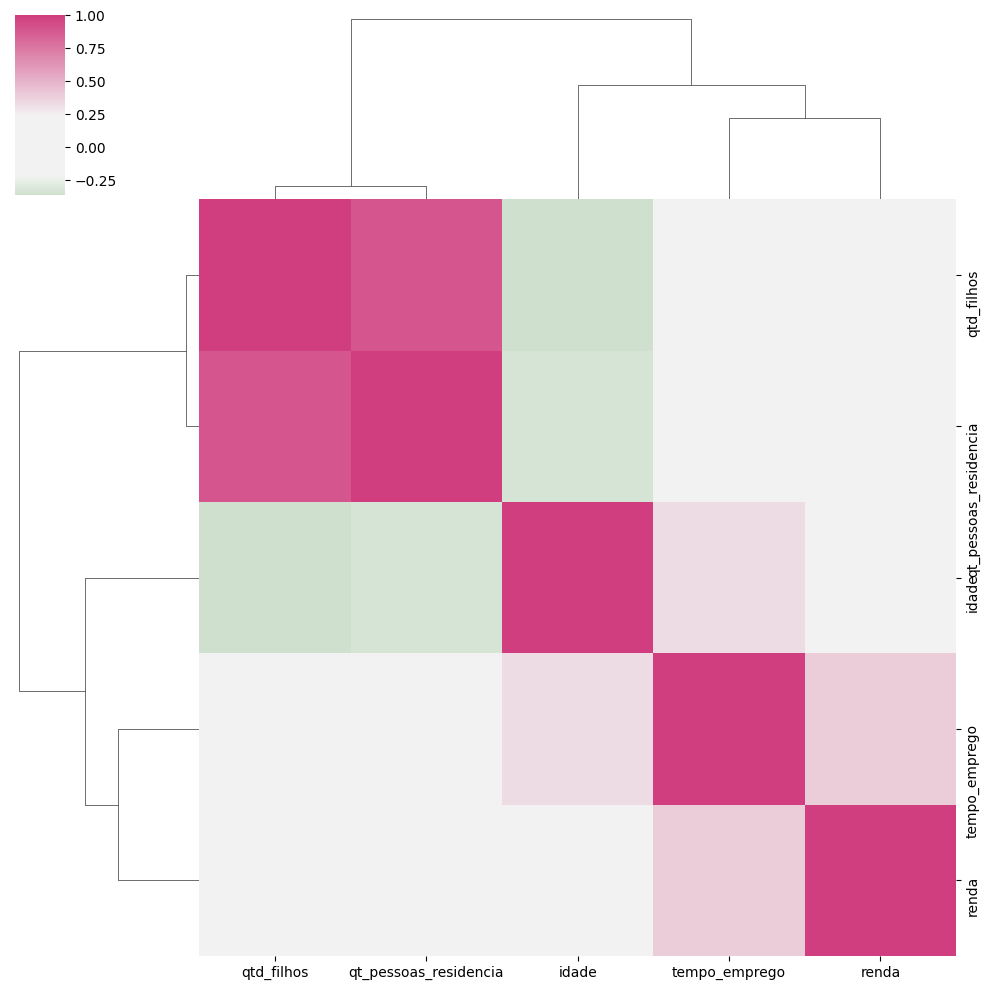

In [4]:
# Matriz de correlação
correlation_matrix = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr()

# Criando um mapa de calor da matriz de correlação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(correlation_matrix, figsize=(10, 10), center = 0, cmap=cmap)
plt.show()

##Insights:
- A idade é um fator determinante para as variaveis tempo_emprego e renda. Quanto maior a idade, maior a renda e consequentemente, maior o tempo de permanencia no emprego.
- A renda também determina a quantidade de filhos e a quantidade de pessoas em uma residencia, agora em decremento. Quanto maior a renda, menos filhos e consequentemente menos pessoas em uma residencia.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

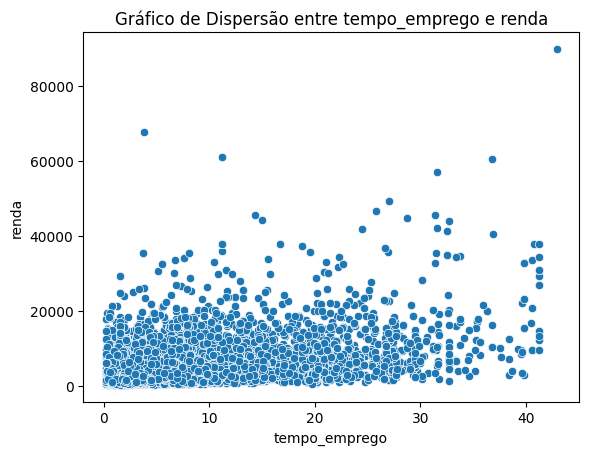

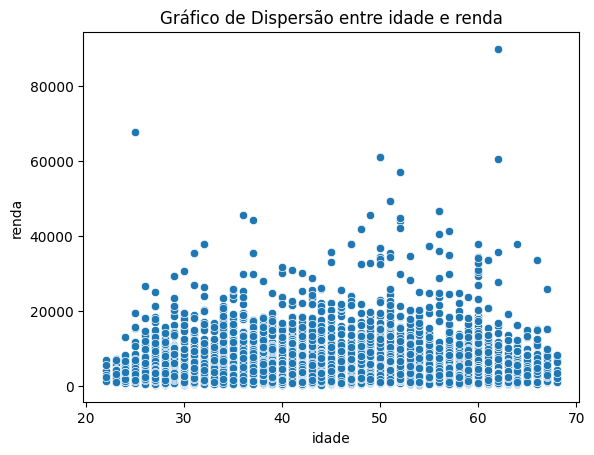

In [5]:
correl_renda = correlation_matrix['renda'].sort_values(ascending=False)

# Identificando as duas variáveis mais correlacionadas com 'renda'
correl_vars = correl_renda.index[1:3]

# Criando gráficos de dispersão para essas duas variáveis em relação a 'renda'
for var in correl_vars:
    sns.scatterplot(data=df, x=var, y='renda')
    plt.title(f'Gráfico de Dispersão entre {var} e renda')
    plt.show()


3) Na sua aopinião, há outliers na variável renda?

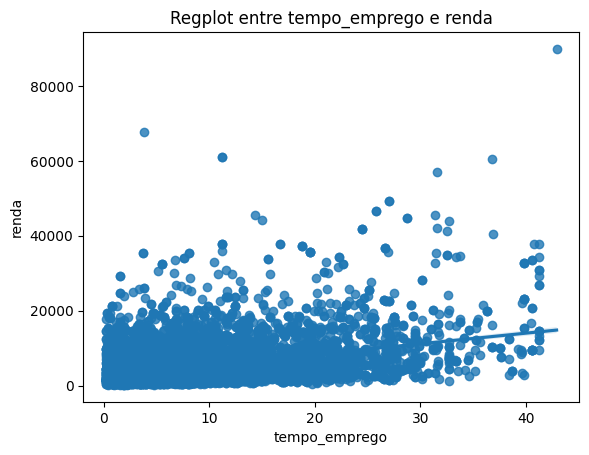

In [6]:
corresp_renda = correlation_matrix['renda'].sort_values(ascending=False).index[1]

sns.regplot(x=df[corresp_renda], y=df['renda'])
plt.title(f'Regplot entre {corresp_renda} e renda')
plt.show()

Os pontos que estão se desviando significativamente da linha de regressão podem ser considerados outliers, pois eles não seguem a tendência geral do restante dos dados.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [11]:
df['log_renda'] = np.log(df['renda'])

In [12]:
correlation_matrix = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']].corr()

top_correlated_vars = correlation_matrix['log_renda'].sort_values(ascending=False).index[1:3]

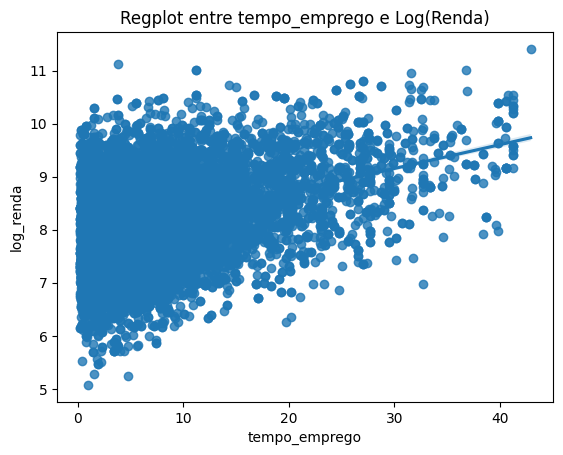

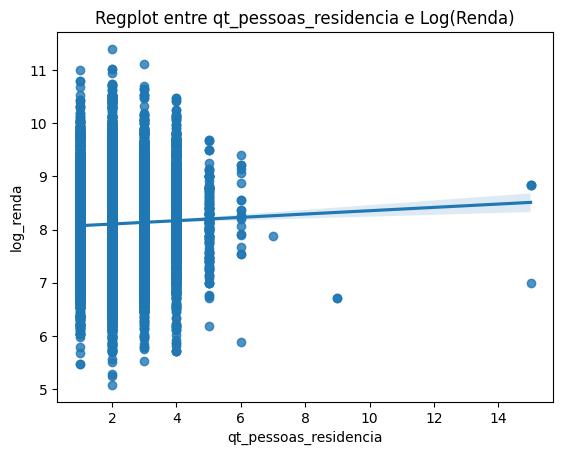

In [13]:
for var in top_correlated_vars:
    sns.regplot(x=df[var], y=df['log_renda'])
    plt.title(f'Regplot entre {var} e Log(Renda)')
    plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na minha análise, o primeiro gráfico referente a tempo_emprego e renda, melhorou, pois não há pontos tão dispersos. Quanto ao segundo gráfico, na minha persepção continuou bem claro, que a quantidade maior de pessoas em uma residencia, não inside no aumento da renda.